In [1]:
import numpy as np
import matplotlib.pyplot as plt
dfs = (10, 10) # default figsize
plt.rcParams['figure.figsize'] = dfs
from src.plotter_functions import load_data

In [2]:
nodestocombines = np.arange(1,100,10)
sample_number = 2
frequency_multiplier = 8
parameter = 'nodestocombine'
basepath = "/home/users/carter10/Shared_Storage/EOSMB_Firn_Modelling/Results/variable_doublegrid/"
basefolder = f'{basepath}sample{sample_number}_freq{frequency_multiplier}_{parameter}'
basefilename = f'CFM_Results_sample{sample_number}_freq{frequency_multiplier}_{parameter}'

In [3]:
example_filename = f'{basefolder}_0/{basefilename}_0.hdf5'
example_ds = load_data(example_filename)

In [4]:
example_ds

<xarray.Dataset>
Dimensions:             (cell: 19087, time: 2198)
Coordinates:
  * cell                (cell) int64 0 1 2 3 4 ... 19082 19083 19084 19085 19086
  * time                (time) float32 1.958e+03 1.958e+03 ... 1.964e+03
Data variables:
    depth               (time, cell) float32 0.0 0.003027 ... 39.85 39.85
    delta_ele           (time) float32 0.0 -0.001083 ... -0.002949 -0.0001203
    cum_ele             (time) float32 0.0 -0.001083 ... 0.05136 0.05124
    compaction          (time, cell) float32 0.0 0.0 0.0 ... 1.661e-08 1.661e-08
    tot_compaction      (time) float32 0.0 0.001484 ... 0.001741 0.001725
    cum_compaction      (time, cell) float32 0.0 0.0 0.0 ... 0.001725 0.001725
    cum_tot_compaction  (time) float32 0.0 0.001484 0.002967 ... 3.405 3.407
    density             (time, cell) float32 350.0 350.0 350.1 ... 728.7 728.7
    snowfall            (time) float32 0.2583 0.2583 0.3081 ... 0.03423 0.4263
    width               (time, cell) float32 0.003027 0.003026 ... 0.001694 nan
    mass                (time, cell) float32 1.059 1.059 1.059 ... 1.234 nan
    cum_mass            (time, cell) float32 1.059 2.119 ... 2.352e+04 2.352e+04

Text(0.5, 1.0, 'Cumulative Elevation Difference to Reference')

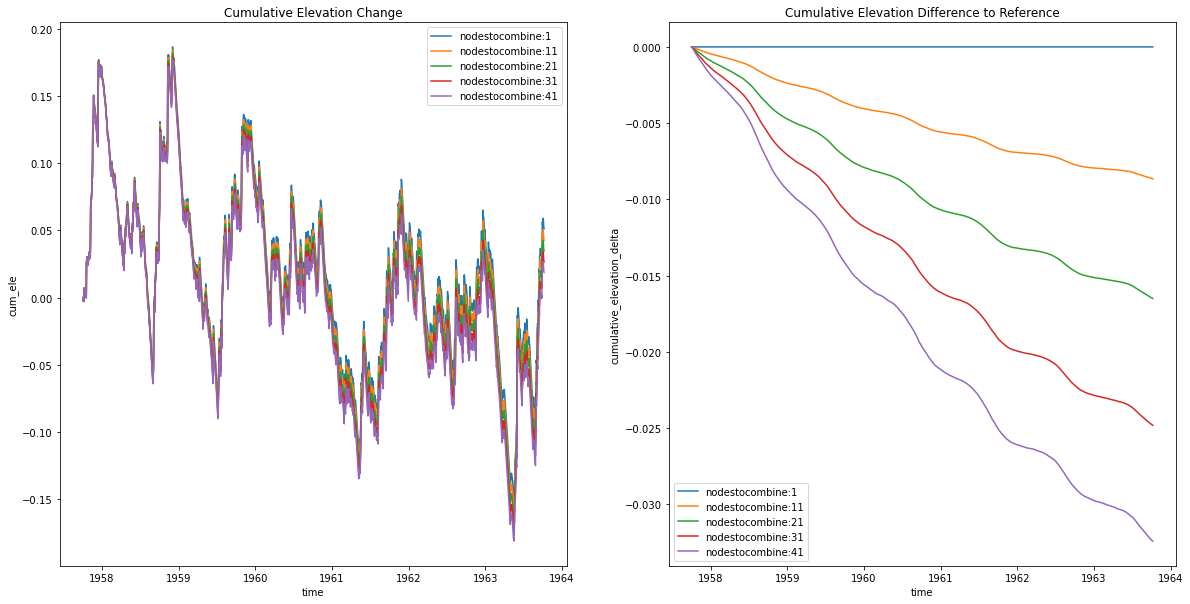

In [5]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    ds['cum_ele'].plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    if i==0:
        reference = ds['cum_ele'][:]
    cum_ele_delta = ds['cum_ele']-reference
    cum_ele_delta.name = 'cumulative_elevation_delta'
    cum_ele_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_title('Cumulative Elevation Change')
axs[1].legend()
axs[1].set_title('Cumulative Elevation Difference to Reference')

Text(0.5, 1.0, 'Cumulative Elevation without Compaction Difference to Reference')

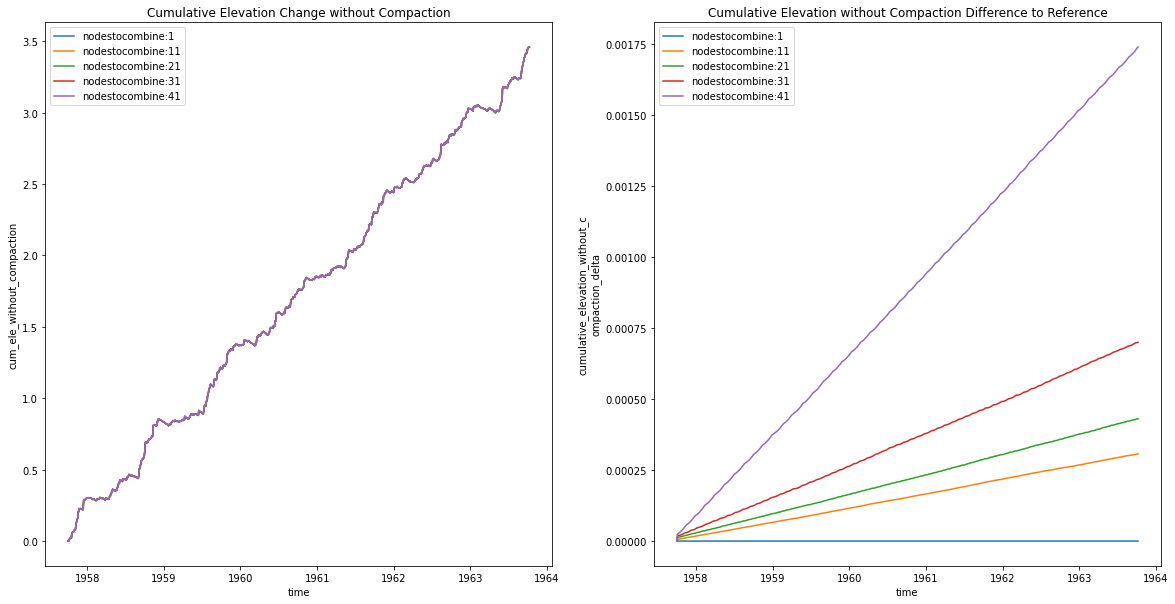

In [10]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    cum_ele_without_compaction = ds['cum_ele']+ds['cum_tot_compaction']
    cum_ele_without_compaction.name = 'cum_ele_without_compaction'
    cum_ele_without_compaction.plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')  
    if i==0:
        reference = cum_ele_without_compaction[:]
    cum_ele_without_compaction_delta = cum_ele_without_compaction-reference
    cum_ele_without_compaction_delta.name = 'cumulative_elevation_without_compaction_delta'
    cum_ele_without_compaction_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_title('Cumulative Elevation Change without Compaction')
axs[1].legend()
axs[1].set_title('Cumulative Elevation without Compaction Difference to Reference')

Text(0.5, 1.0, 'Cumulative Elevation from Compaction Difference to Reference')

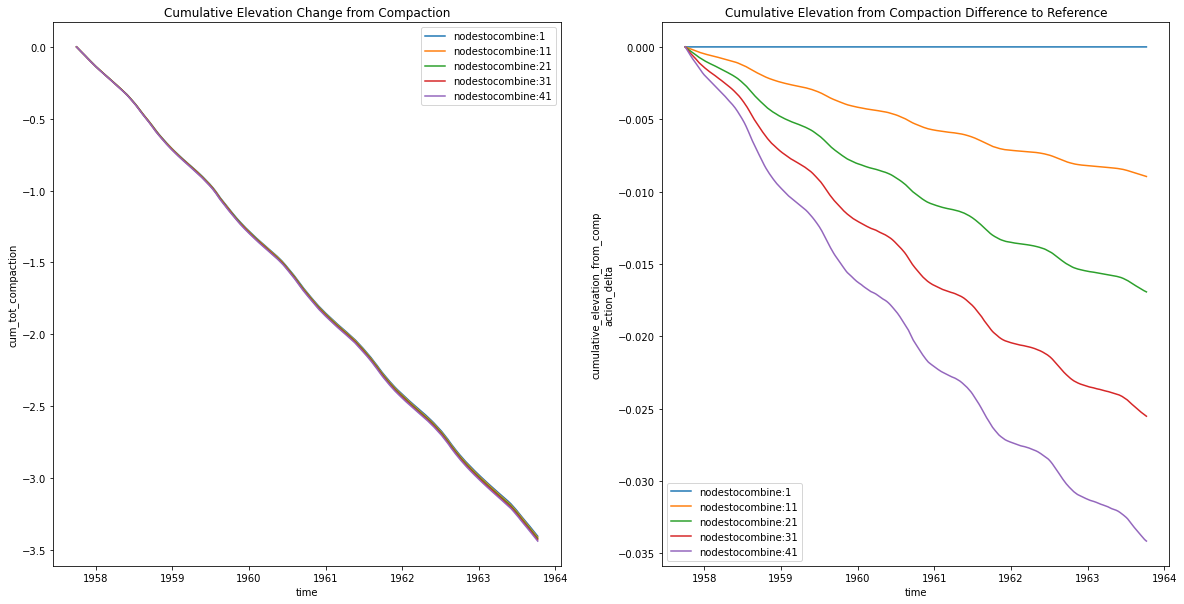

In [12]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    cum_ele_compaction = -ds['cum_tot_compaction']
    cum_ele_compaction.plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')  
    if i==0:
        reference = cum_ele_compaction[:]
    cum_ele_compaction_delta = cum_ele_compaction-reference
    cum_ele_compaction_delta.name = 'cumulative_elevation_from_compaction_delta'
    cum_ele_compaction_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_title('Cumulative Elevation Change from Compaction')
axs[1].legend()
axs[1].set_title('Cumulative Elevation from Compaction Difference to Reference')

Text(0.5, 1.0, 'Total Compaction Difference to Reference')

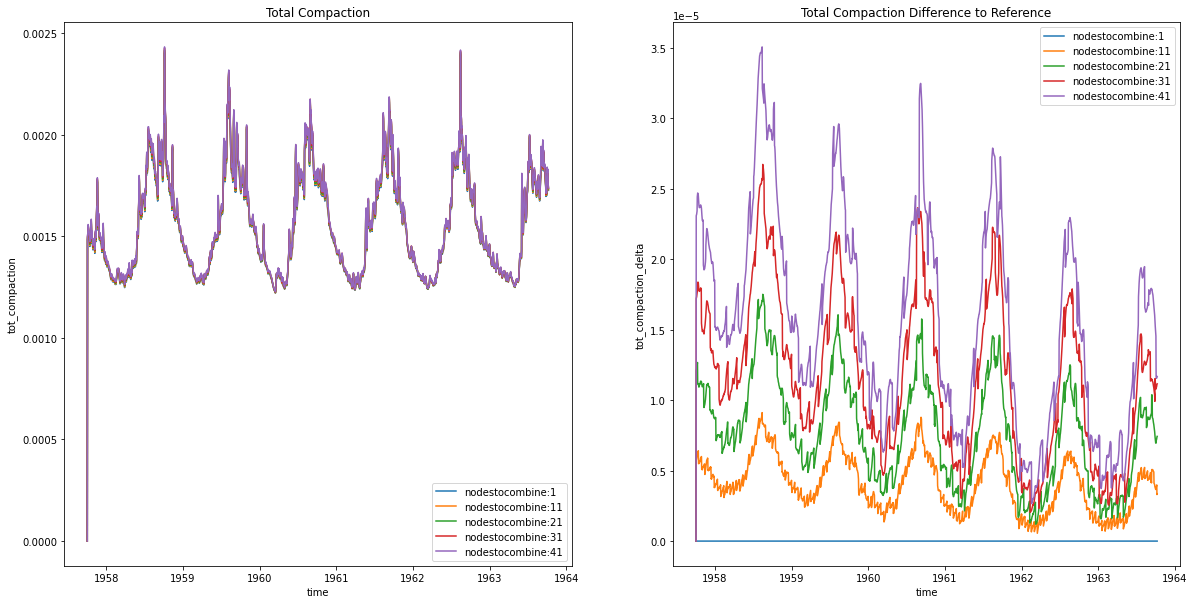

In [72]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    if i==0:
        reference = ds['tot_compaction']
    ds['tot_compaction'].plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    tot_compaction_delta = ds['tot_compaction']-reference
    tot_compaction_delta.name = 'tot_compaction_delta'
    tot_compaction_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_title('Total Compaction')
axs[1].legend()
axs[1].set_title('Total Compaction Difference to Reference')

Text(0.5, 1.0, 'Elevation Change without Compaction Difference to Reference')

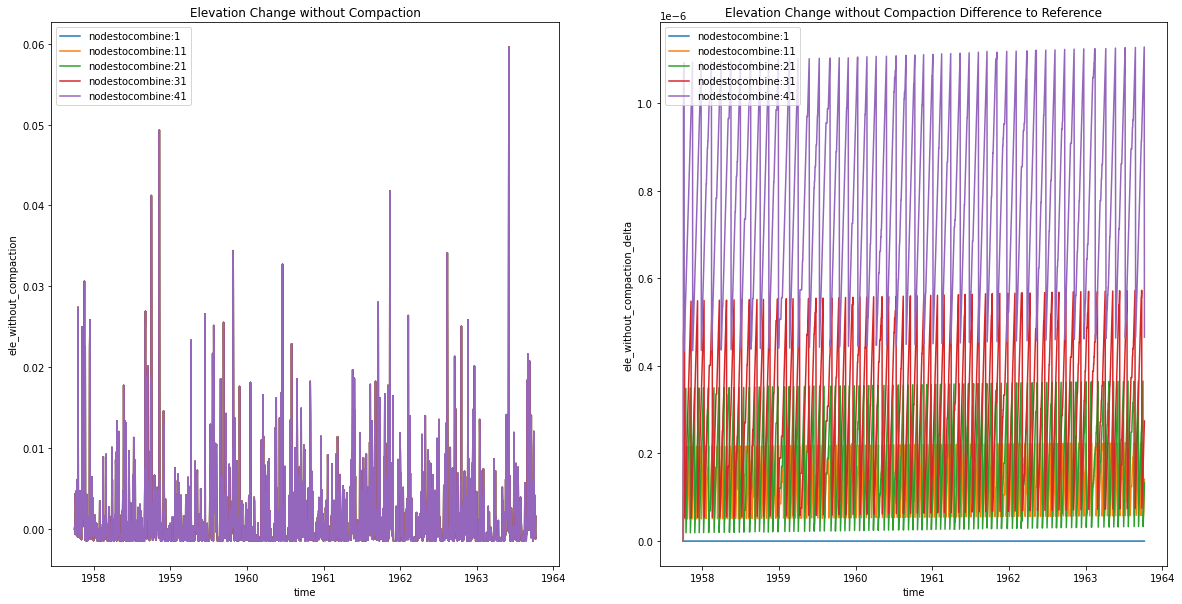

In [20]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    delta_ele_without_compaction = ds['delta_ele']+ds['tot_compaction']
    delta_ele_without_compaction.name = 'ele_without_compaction'
    delta_ele_without_compaction.plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    if i==0:
        reference = delta_ele_without_compaction[:]
    delta_ele_without_compaction_delta = delta_ele_without_compaction-reference
    delta_ele_without_compaction_delta.name = 'ele_without_compaction_delta'
    delta_ele_without_compaction_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_title('Elevation Change without Compaction')
axs[1].legend()
axs[1].set_title('Elevation Change without Compaction Difference to Reference')

Text(0.5, 1.0, 'Total Depth Difference to Reference')

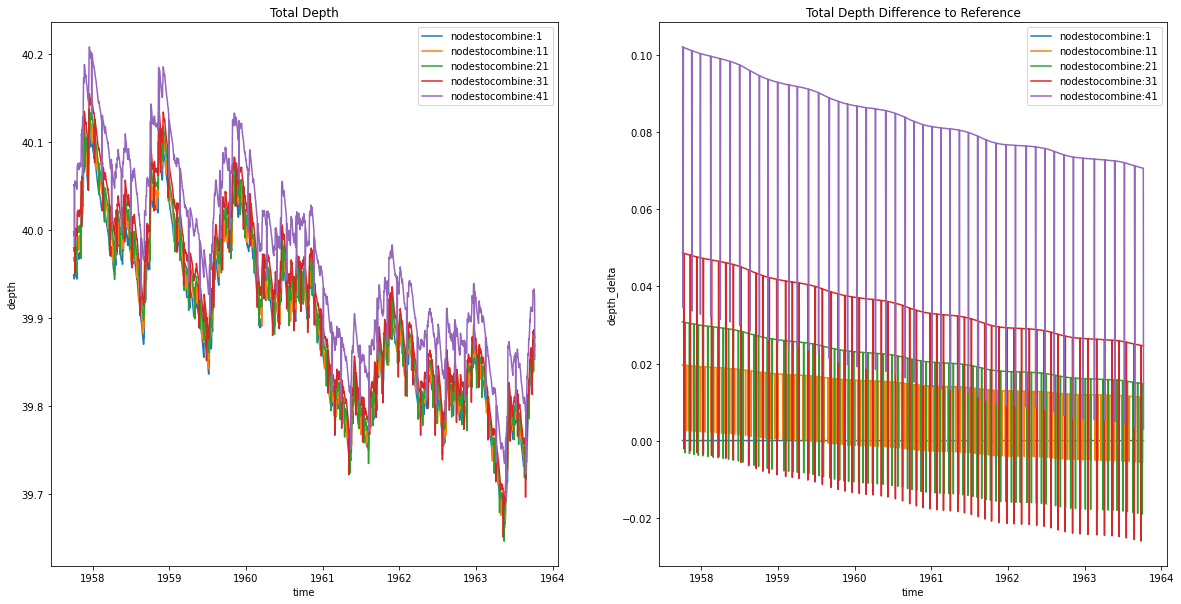

In [85]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    if i==0:
        reference = ds['depth'].max('cell')
    ds['depth'].max('cell').plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    depth_delta = ds['depth'].max('cell')-reference
    depth_delta.name = 'depth_delta'
    depth_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_title('Total Depth')
axs[1].legend()
axs[1].set_title('Total Depth Difference to Reference')

Text(0.5, 1.0, 'Difference in Compaction/Width Relative to Reference against Cell Depth, Timestamp = 1957.75')

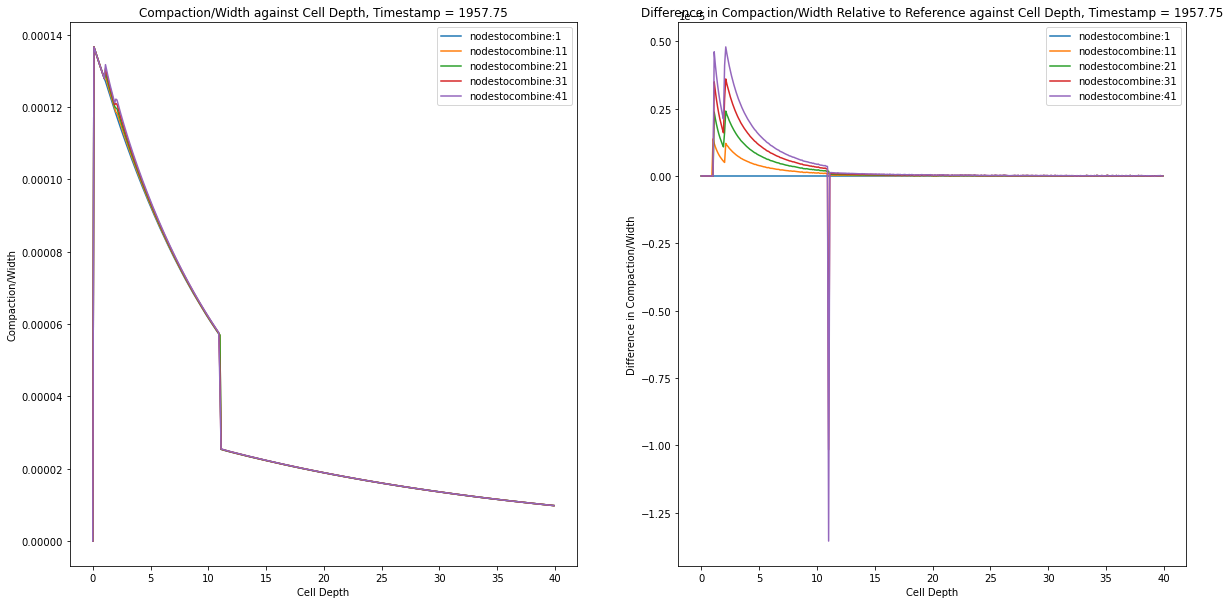

In [11]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    ds = ds.isel(time=1)
    timestamp = np.round(ds['time'].values,2)
    ds['compaction_over_width'] = ds['compaction']/ds['width']
    ds = ds[['depth','compaction_over_width']].groupby('depth').mean('cell').interp(depth=np.arange(0,40,0.1))
    ds['compaction_over_width'].plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    if i==0:
        reference = ds['compaction_over_width'][:] 
    compaction_over_width_delta = ds['compaction_over_width']-reference
    compaction_over_width_delta.name = 'compaction_over_width_delta'
    compaction_over_width_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_xlabel('Cell Depth')
axs[0].set_ylabel('Compaction/Width')
axs[0].legend()
axs[0].set_title(f'Compaction/Width against Cell Depth, Timestamp = {timestamp}')
axs[1].legend()
axs[1].set_xlabel('Cell Depth')
axs[1].set_ylabel('Difference in Compaction/Width')
axs[1].set_title(f'Difference in Compaction/Width Relative to Reference against Cell Depth, Timestamp = {timestamp}')

Text(0.5, 1.0, 'Difference in Cumulative Mass Relative to Reference against Cell Depth, Timestamp = 1957.75')

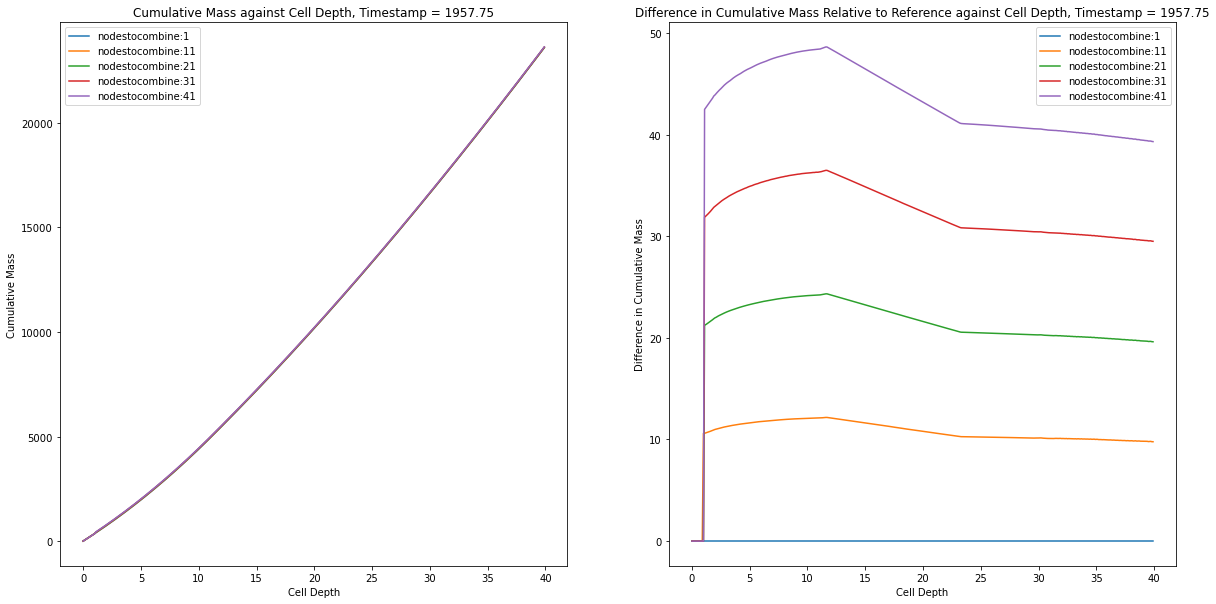

In [7]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    ds = ds.isel(time=1)
    timestamp = np.round(ds['time'].values,2)
    ds = ds[['depth','cum_mass']].groupby('depth').mean('cell').interp(depth=np.arange(0,40,0.1))
    ds['cum_mass'].plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    if i==0:
        reference = ds['cum_mass'][:] 
    cum_mass_delta = ds['cum_mass']-reference
    cum_mass_delta.name = 'cum_mass_delta'
    cum_mass_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_xlabel('Cell Depth')
axs[0].set_ylabel('Cumulative Mass')
axs[0].legend()
axs[0].set_title(f'Cumulative Mass against Cell Depth, Timestamp = {timestamp}')
axs[1].legend()
axs[1].set_xlabel('Cell Depth')
axs[1].set_ylabel('Difference in Cumulative Mass')
axs[1].set_title(f'Difference in Cumulative Mass Relative to Reference against Cell Depth, Timestamp = {timestamp}')

Text(0.5, 1.0, 'Difference in Cumulative Compaction Relative to Reference against Cell Depth, Timestamp = {timestamp}')

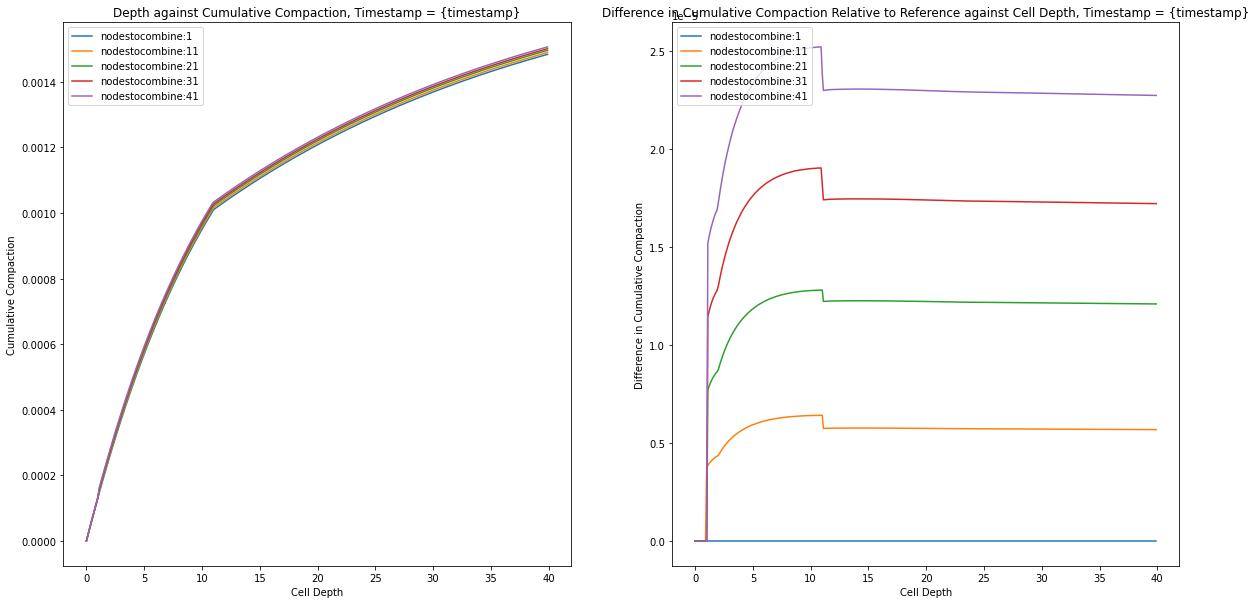

In [13]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    ds = ds.isel(time=1)
    timestamp = np.round(ds['time'].values,2)
    ds = ds[['depth','cum_compaction']].groupby('depth').mean('cell').interp(depth=np.arange(0,40,0.1))
    ds['cum_compaction'].plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    if i==0:
        reference = ds['cum_compaction'][:] 
    cum_compaction_delta = ds['cum_compaction']-reference
    cum_compaction_delta.name = 'cum_compaction_delta'
    cum_compaction_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_xlabel('Cell Depth')
axs[0].set_ylabel('Cumulative Compaction')
axs[0].legend()
axs[0].set_title('Depth against Cumulative Compaction, Timestamp = {timestamp}')
axs[1].legend()
axs[1].set_xlabel('Cell Depth')
axs[1].set_ylabel('Difference in Cumulative Compaction')
axs[1].set_title('Difference in Cumulative Compaction Relative to Reference against Cell Depth, Timestamp = {timestamp}')

Text(0.5, 1.0, 'Difference in Mean Cumulative Compaction Relative to Reference against Mean Cell Depth')

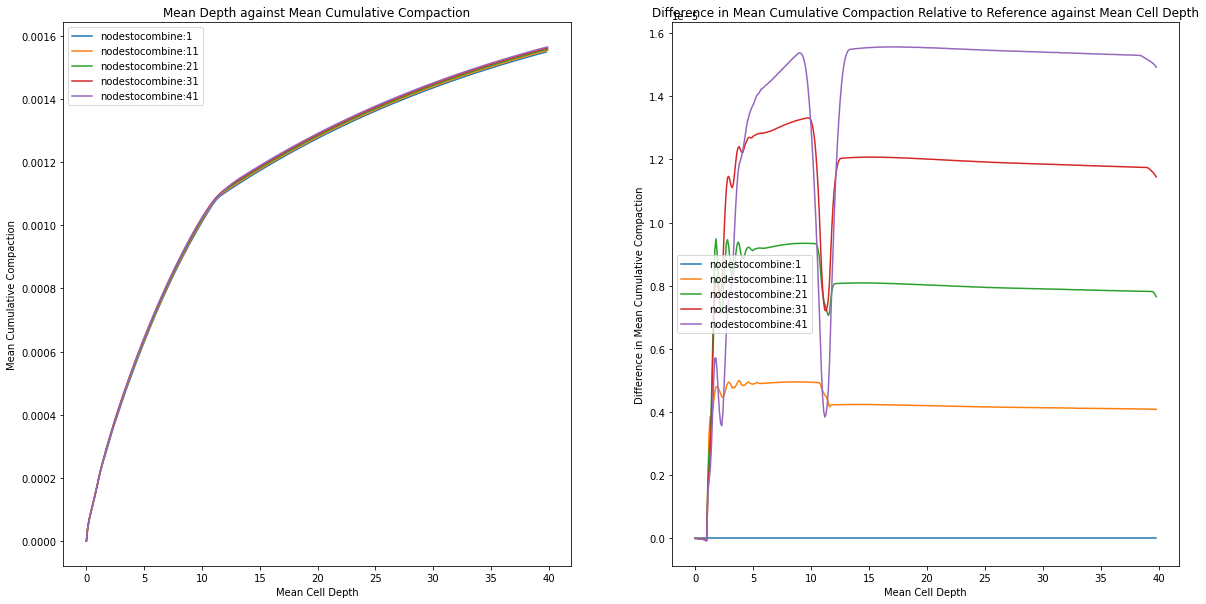

In [14]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    ds = ds[['depth','cum_compaction']].mean('time').groupby('depth').mean('cell').interp(depth=np.arange(0,40,0.1))
    ds['cum_compaction'].plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    if i==0:
        reference = ds['cum_compaction'][:]
    cum_compaction_delta = ds['cum_compaction']-reference
    cum_compaction_delta.name = 'cum_compaction_delta'
    cum_compaction_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_xlabel('Mean Cell Depth')
axs[0].set_ylabel('Mean Cumulative Compaction')
axs[0].legend()
axs[0].set_title('Mean Depth against Mean Cumulative Compaction')
axs[1].legend()
axs[1].set_xlabel('Mean Cell Depth')
axs[1].set_ylabel('Difference in Mean Cumulative Compaction')
axs[1].set_title('Difference in Mean Cumulative Compaction Relative to Reference against Mean Cell Depth')

Text(0.5, 1.0, 'Difference in Total Mass against Time')

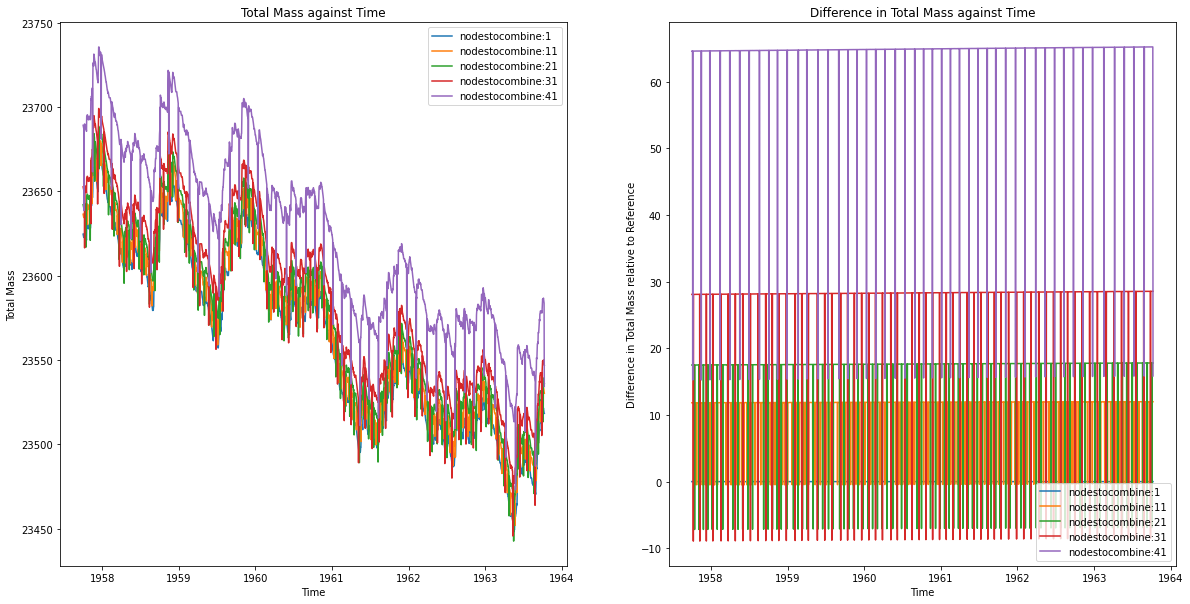

In [16]:
# Demonstrating relationship of elevation output with nodestocombine:
fig, axs = plt.subplots(1,2,figsize=[dfs[0]*2,dfs[1]])
for i in np.arange(0,5,1):
    filename = f'{basefolder}_{i}/{basefilename}_{i}.hdf5'
    ds = load_data(filename)
    total_mass = ds['mass'].sum('cell')
    total_mass.plot(ax=axs[0],label=f'nodestocombine:{nodestocombines[i]}')
    if i==0:
        reference = total_mass
    total_mass_delta = total_mass-reference
    total_mass_delta.name = 'total_mass_delta'
    total_mass_delta.plot(ax=axs[1],label=f'nodestocombine:{nodestocombines[i]}')
axs[0].legend()
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Total Mass')
axs[0].legend()
axs[0].set_title('Total Mass against Time')
axs[1].legend()
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Difference in Total Mass relative to Reference')
axs[1].set_title('Difference in Total Mass against Time')